# Initial Data Exploration

Initial data exploration of newspaper articles and the industrial production index.

Outline:
- Newspaper articles
- Industrial production index

## Newspaper articles

Primary source: "All the News 2.1". Articles are sampled by publication (publishers) for computational limitations in ../src/dataset.py

In [10]:
import pandas as pd
# load publishers data from the corresponding file
publishers = pd.read_csv("../data/processed/publishers.csv") 
publishers.head()

,publication,n_articles
0,Reuters,840094
1,The New York Times,252259
2,CNBC,238096
3,The Hill,208411
4,People,136488


<Axes: xlabel='publication'>

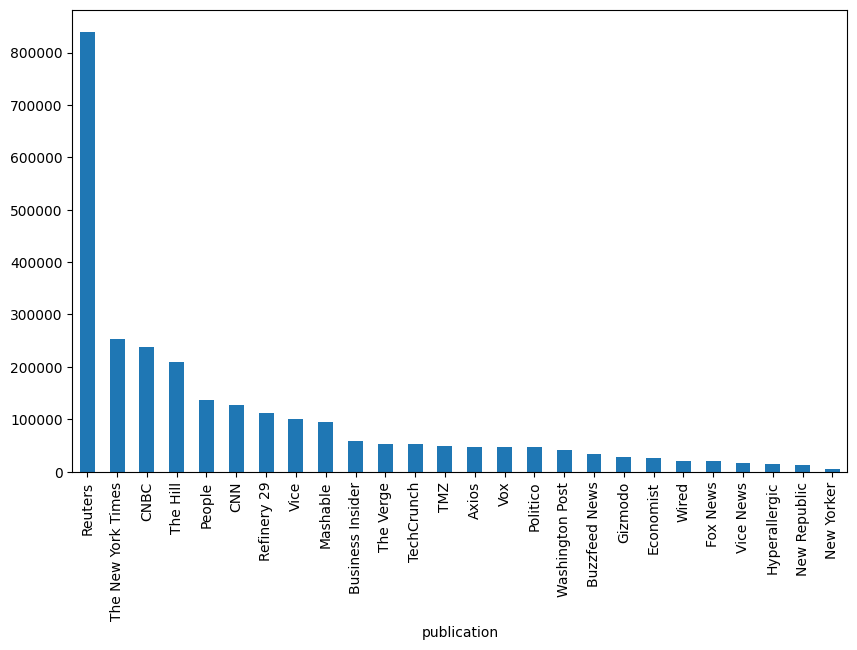

In [14]:
# plot n_articles by publisher
publishers.plot(x="publication", y="n_articles", kind="bar", figsize=(10, 6), legend=False)

,publication,n_sampled,title_mean,title_median,article_mean,article_median
0,Reuters,10000,9.9,10.0,284.9,216.0
1,The New York Times,10000,9.1,9.0,920.8,860.0
24,New Republic,10000,9.1,9.0,870.8,534.0
23,Hyperallergic,10000,9.2,9.0,840.1,761.0
22,Vice News,10000,11.8,12.0,822.2,719.0
21,Fox News,10000,10.7,10.0,608.2,390.0
20,Wired,10000,9.7,10.0,479.7,160.0
19,Economist,10000,11.2,11.0,788.4,713.0
18,Gizmodo,10000,10.9,11.0,543.5,447.0
17,Buzzfeed News,10000,12.0,12.0,805.0,558.0


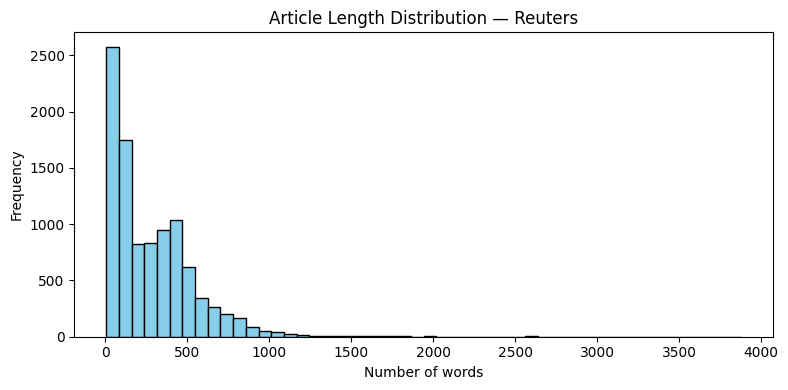

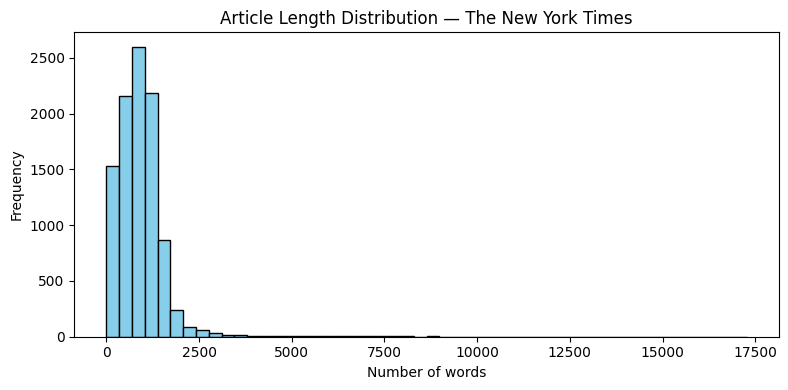

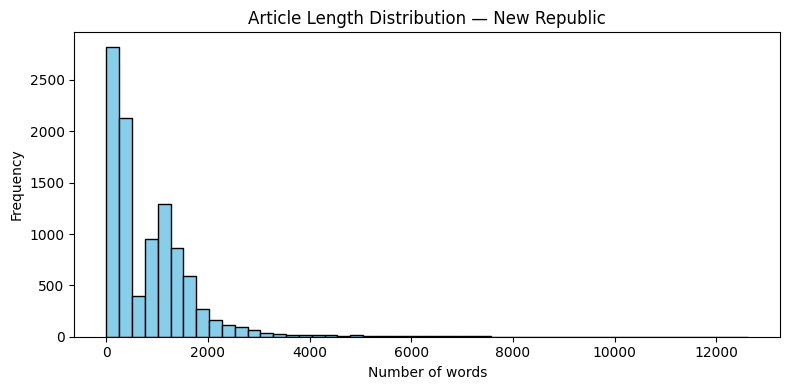

In [16]:
# --- Descriptive statistics on title & article lengths using the saved samples ---
import re
import matplotlib.pyplot as plt

summary = []
for pub in publishers['publication']:
    # match the sample file we already wrote
    safe   = re.sub(r'\W+','_', pub.lower()).strip('_')
    sample = pd.read_csv(f"../data/processed/newspapers/sample_{safe}.csv")
    # compute word counts on the already‐sampled data
    title_lens   = sample['title'].dropna().str.split().str.len()
    article_lens = sample['article'].dropna().str.split().str.len()
    summary.append({
        'publication':     pub,
        'n_sampled':       len(sample),
        'title_mean':      round(title_lens.mean(), 1),
        'title_median':    title_lens.median(),
        'article_mean':    round(article_lens.mean(), 1),
        'article_median':  article_lens.median()
    })

stats_df = pd.DataFrame(summary).sort_values('n_sampled', ascending=False)
display(stats_df)

# Plot article‐length distribution for top 3 publishers by sample size
top_pubs = stats_df['publication'].head(3).tolist()
for pub in top_pubs:
    safe   = re.sub(r'\W+','_', pub.lower()).strip('_')
    sample = pd.read_csv(f"../data/processed/newspapers/sample_{safe}.csv")
    lens   = sample['article'].dropna().str.split().str.len()
    plt.figure(figsize=(8, 4))
    plt.hist(lens, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Article Length Distribution — {pub}')
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

C:\Users\MarxerB\AppData\Local\Temp\ipykernel_21980\1466448125.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


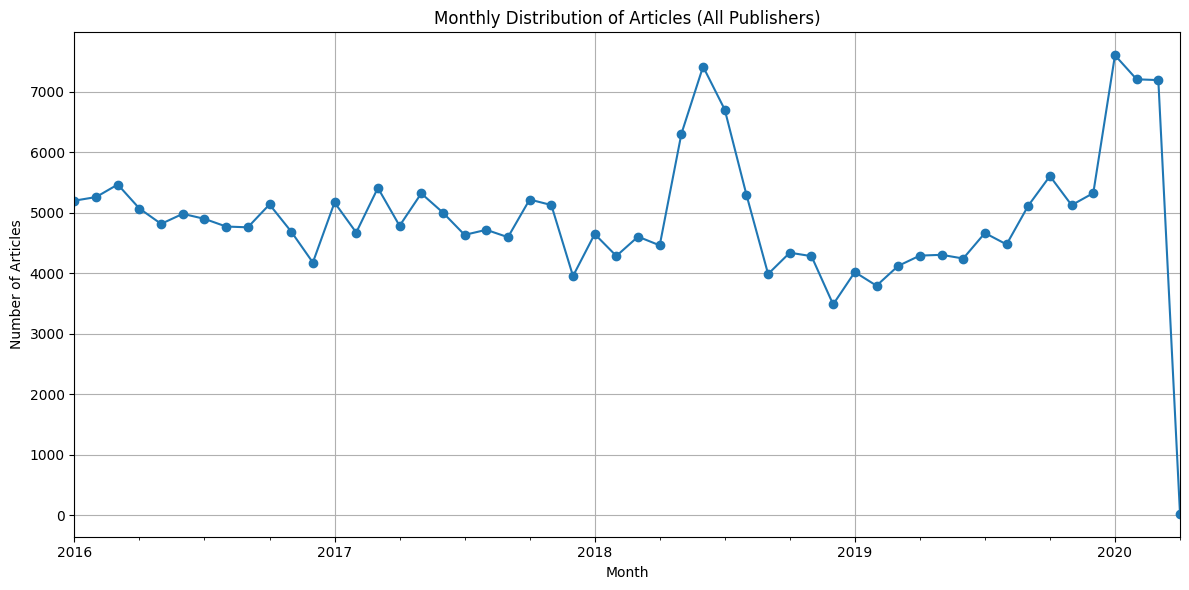

In [17]:
# VSCode.Cell id="51d3a906" language="python"
import glob
import matplotlib.pyplot as plt

# --- Monthly distribution of articles over time (all publishers) ---
all_files = glob.glob("../data/processed/newspapers/sample_*.csv")
df_all    = pd.concat(
    [pd.read_csv(f, parse_dates=["date"]) for f in all_files],
    ignore_index=True
)

# drop rows with missing dates
df_all = df_all.dropna(subset=["date"])

# count articles per month
monthly_counts = (
    df_all
      .set_index("date")
      .resample("M")
      .size()
)

# plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(marker="o", linestyle="-")
plt.title("Monthly Distribution of Articles (All Publishers)")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 5 Random Observations from the combined dataset
sampled_combined = df_all.sample(5, random_state=42)
print("5 Random Observations from the Combined Dataset:")
print(sampled_combined[['publication', 'date', 'title', 'article']])

5 Random Observations from the Combined Dataset:
        publication       date  \
144048  Refinery 29 2020-03-30   
795           Axios 2018-07-24   
77861       Gizmodo 2016-01-28   
188908    The Verge 2017-04-05   
61471      Fox News 2018-08-05   

                                                    title  \
144048  Aromatherapy Associates + Aromatherapy Associa...   
795     GOP candidates have a lot more cash in 2018 mi...   
77861   Shocking NASA Satellite Photos Reveal Large Ar...   
188908  This 18-rotor electric ‘flying taxi’ will be b...   
61471   The Latest: French minister: Nation is adaptin...   

                                                  article  
144048                                                NaN  
795     Republicans in 14 toss-up races are crushing D...  
77861   NASA’s Terris MODIS camera reveals how much bl...  
188908  The hot new trend in aeronautics these days is...  
61471   \n          next\n         Image 1 of 2 \n    ...  


## Industrial Production Index

Primary source: FRED. Index is sourced and pre-processed in ../src/dataset.py

In [22]:
# load INDPRO data
df_indpro = pd.read_csv("../data/raw/INDPRO.csv", parse_dates=["observation_date"])

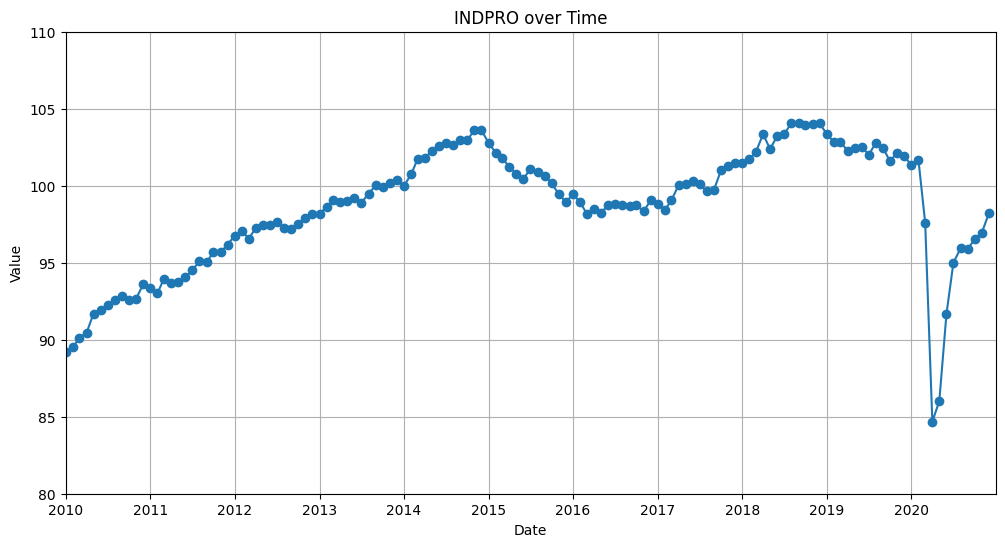

In [23]:
# plot INDPRO over time
plt.figure(figsize=(12, 6))
plt.plot(df_indpro["observation_date"], df_indpro["INDPRO"], marker="o", linestyle="-")
plt.title("INDPRO over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xlim(pd.Timestamp("2010-01-01"), pd.Timestamp("2020-12-31"))
plt.ylim(80, 110)
plt.grid()